In [1]:
# Import the required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Create a dataset for classification, and split into traning and test datasets
X, y = make_classification(1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, flip_y=0.05, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [3]:
# Initialize the weights (note that we have no intercept term)
np.random.seed(4)
W = np.random.randn(2)

In [4]:
# Output probability of y = 1 for a given x
def predict(x, w):
    return 1 / (1 + np.exp(-np.matmul(x, w)))

In [5]:
predict(X_train[0], W)

0.7430884674253876

In [6]:
# Ouput the log-likelihood associated with x
def log_likelihood(x, y):
    return y * np.nan_to_num(np.log(x)) + (1 - y) * np.nan_to_num(np.log(1 - x))

In [7]:
log_likelihood(predict(X_train[0], W), y_train[0])

-0.2969401734851157

In [8]:
# Estimate the gradient associated with a give observation
def estimate_gradient(x, y, w):
    return np.nan_to_num((2 * y - 1) / predict(x, W) * x * np.nan_to_num(np.exp(-np.matmul(x, w))) / (np.nan_to_num(np.exp(-np.matmul(x, w))) + 1)**2)

In [9]:
# Initialize the learning rate
a = 0.005

In [10]:
# Initialize the number of epochs of training
num_epochs = 45

In [11]:
# Estimate the accuracy ratio associated with the initial parameters on the training dataset
predictions = predict(X_train, W)
predictions = predictions.astype(int)
accuracy_score(y_train, predictions)

0.5025

In [12]:
# Implement gradient ascent
parameter_values = np.reshape(W, (1, -1))
accuracy_ratios = [accuracy_score(y_train, predictions)]
for i in range(num_epochs):
    for j in range(X_train.shape[0]):
        W = W + a * estimate_gradient(X_train[j], y_train[j], W)
    parameter_values = np.concatenate((parameter_values, np.reshape(W, (1, -1))), axis=0)
    predictions = predict(X_train, W)
    predictions = predictions.astype(int)
    accuracy_ratios.append(accuracy_score(y_train, predictions))

/Users/chingismaximov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chingismaximov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chingismaximov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Estimate accuracy of the trained model on the traning dataset
predictions = predict(X_train, W)
predictions = predictions.astype(int)
accuracy_score(y_train, predictions)

0.8375

In [14]:
# Fit sklearn model to the training dataset and check accuracy
reg = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_train, reg.predict(X_train))

0.87625

In [15]:
# Check accuracy of the model on test sample
predictions = predict(X_test, W)
predictions = predictions.astype(int)
accuracy_score(y_test, predictions)

0.83

In [16]:
# Check accuracy of the sklearn model on test sample
accuracy_score(y_test, reg.predict(X_test))

0.875

In [17]:
# Prepare data for contour plot
X, Y = np.meshgrid(parameter_values[:, 0], parameter_values[:, 1])
Z = np.zeros((X.shape[0], X.shape[1]))
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        w = np.array([X[1][j], Y[i][1]])
        predictions = predict(X_train, w)
        predictions = predictions.astype(int)
        Z[i][j] = accuracy_score(y_train, predictions)

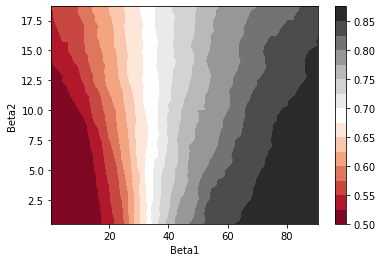

In [18]:
plt.contourf(X, Y, Z, 15, cmap='RdGy')
# plt.title('Accuracy Ratio Contour Plot')
plt.xlabel('Beta1')
plt.ylabel('Beta2')
plt.colorbar();